In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import matplotlib as plt

df_clean = pd.read_csv("../data/cleaned_data.csv")
df_clean.head()

,age,gender,blood_pressure,cholesterol_level,exercise_habits,smoking,family_heart_disease,diabetes,bmi,high_blood_pressure,low_hdl_cholesterol,high_ldl_cholesterol,stress_level,sleep_hours,sugar_consumption,triglyceride_level,fasting_blood_sugar,crp_level,homocysteine_level,heart_disease_status
0,56.0,1.0,153.0,155.0,2.0,1.0,1.0,0.0,24.991591,1.0,1.0,0.0,1.0,7.633228,1.0,342.0,120.0,12.969246,12.387250,0
1,69.0,0.0,146.0,286.0,2.0,0.0,1.0,1.0,25.221799,0.0,1.0,0.0,2.0,8.744034,1.0,133.0,157.0,9.355389,19.298875,0
2,46.0,1.0,126.0,216.0,0.0,0.0,0.0,0.0,29.855447,0.0,1.0,1.0,0.0,4.440440,0.0,393.0,92.0,12.709873,11.230926,0
3,32.0,0.0,122.0,293.0,2.0,1.0,1.0,0.0,24.130477,1.0,0.0,1.0,2.0,5.249405,2.0,293.0,94.0,12.509046,5.961958,0
4,60.0,1.0,166.0,242.0,0.0,1.0,1.0,1.0,20.486289,1.0,0.0,0.0,2.0,7.030971,2.0,263.0,154.0,10.381259,8.153887,0


In [ ]:
X = df_clean.drop("heart_disease_status", axis=1)
y = df_clean["heart_disease_status"]

# Train/test split - #split 80-20% 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.preprocessing import StandardScaler
#this makes it better for logistic regression model 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
#i decided to choose logistic regression model 
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7896389324960753
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1509
           1       0.00      0.00      0.00       402

    accuracy                           0.79      1911
   macro avg       0.39      0.50      0.44      1911
weighted avg       0.62      0.79      0.70      1911



c:\Users\ananr\anaconda3\envs\machine_learning\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ananr\anaconda3\envs\machine_learning\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ananr\anaconda3\envs\machine_learning\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metri

In [13]:
from sklearn.metrics import roc_auc_score, roc_curve

roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1])
print("ROC-AUC:", roc_auc)
#initial ROC-AUC score is 0.500 which is not very good (performing like random guessing)

ROC-AUC: 0.5002208968411752


In [ ]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))
#check class balance first 


heart_disease_status
0    0.801649
1    0.198351
Name: proportion, dtype: float64
heart_disease_status
0    0.789639
1    0.210361
Name: proportion, dtype: float64


The class balance is very unbalanced (in particular, the target class -> 80% of patients don't have heart disease, 20% do)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

model = LogisticRegression(class_weight="balanced", random_state=42)
model.fit(X_train_scaled, y_train)
y_pred_proba = model.predict_proba(X_test_scaled)[:,1]

print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))


ROC-AUC: 0.5009989812369564


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100, random_state=42, class_weight="balanced"
)
rf.fit(X_train, y_train)
y_pred_proba = rf.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_auc_score
print("Random Forest ROC-AUC:", roc_auc_score(y_test, y_pred_proba))


Random Forest ROC-AUC: 0.5208162303129811


random forest is better for unbalanced but ROC-AUC score is still not good. 

<Axes: >

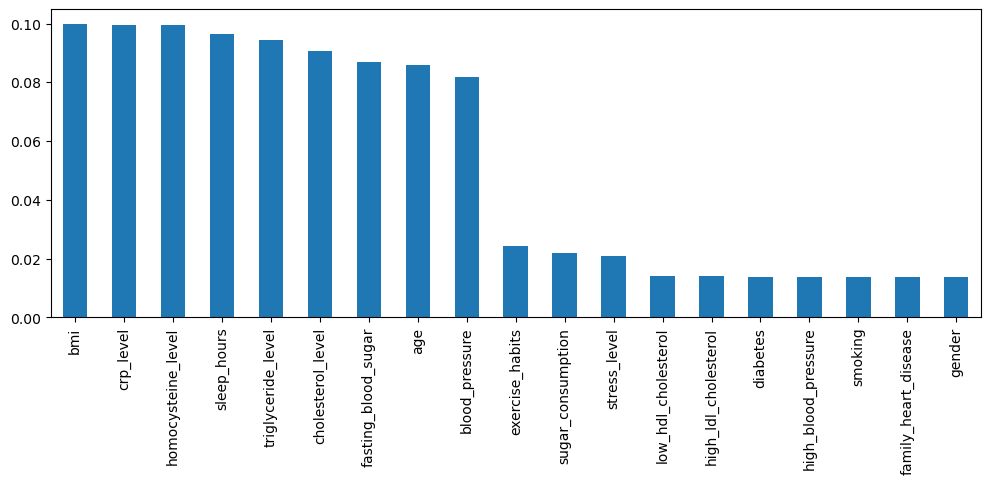

In [ ]:
import pandas as pd

importances = rf.feature_importances_
feat_importance = pd.Series(importances, index=X_train.columns)
feat_importance.sort_values(ascending=False).plot(kind='bar', figsize=(12,4))


From this chart (when initially ran), we can see that we have many features that are unimportant overall to the model's predictions. 

We will use our domain knowledge to determine which columns to drop: e.g. while the model deemed stress, smoking, diabetes etc. as having low importance, we know in real life that they do cause such. In fact, all of these columns have some degree of relevance though perhaps we can combine sugar_consumption with diabetes 

In [19]:
from imblearn.over_sampling import SMOTE

X = df_clean.drop('heart_disease_status', axis=1)
y = df_clean['heart_disease_status']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

rf = RandomForestClassifier(
    n_estimators=200, max_depth=None, min_samples_leaf=5, class_weight='balanced', random_state=42
)
rf.fit(X_train, y_train)
y_pred_proba = rf.predict_proba(X_test)[:,1]

print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))


ROC-AUC: 0.9368939653694497


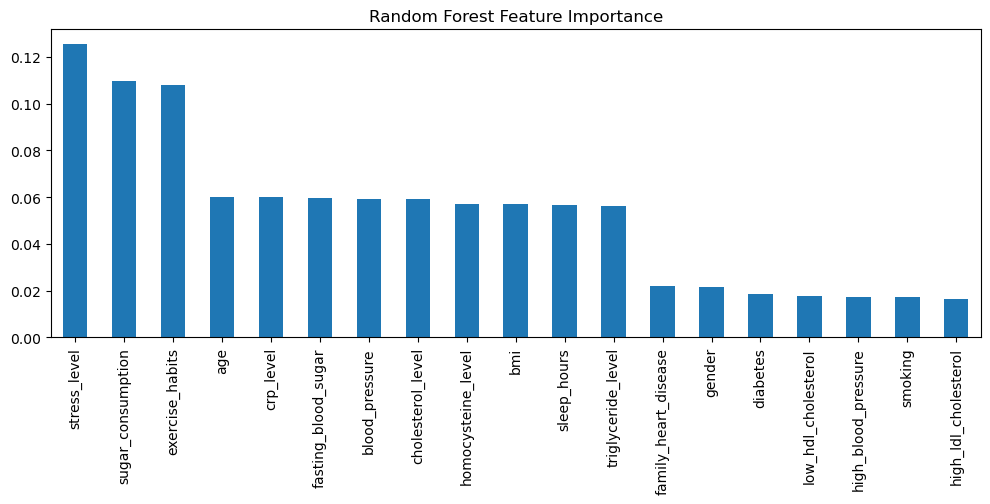

In [22]:

feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12,4))
plt.title("Random Forest Feature Importance")
plt.show()


In [23]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(rf, X_res, y_res, scoring='roc_auc', cv=5)
print("5-fold CV ROC-AUC:", cv_score.mean())


5-fold CV ROC-AUC: 0.9468048444823113


cross validation shows our ROC-AUC score isn't some fluke. 

In [26]:
from sklearn.metrics import accuracy_score

# Use your predictions (threshold 0.5 for binary)
y_pred = (y_pred_proba >= 0.5).astype(int)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


Accuracy: 0.869721767594108


Accuracy is 87% which is good but it could be misleading as our dataset is imbalanced. ROC-AUC which measures how well the model ranks positives higher than negatives, regardless of a fixed threshold is a much better evaluation metric. 

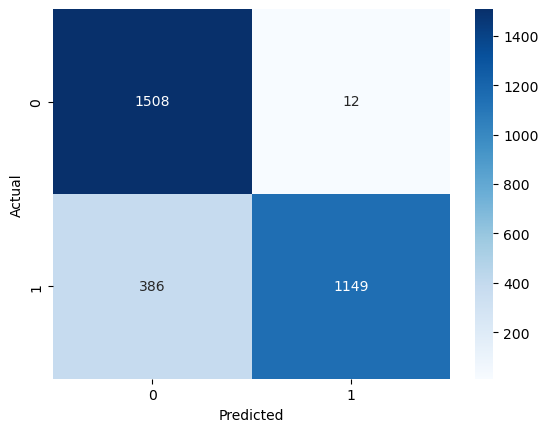

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = (y_pred_proba >= 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.99      0.88      1520
           1       0.99      0.75      0.85      1535

    accuracy                           0.87      3055
   macro avg       0.89      0.87      0.87      3055
weighted avg       0.89      0.87      0.87      3055

